In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
DATA_PATH = 'G:/Shared drives/DM_tweets/data/'

In [2]:
DATA_PATH = 'G:/Drive condivisi/DM_tweets/data/'

In [3]:
df_users = pd.read_csv(DATA_PATH+'users.csv')
df_tweets = pd.read_csv(DATA_PATH + 'tweets_no_dupl_1.5.csv', sep='#')

## Users file analysis

In [4]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


# Statuses count

For users with a non-null `statuses_count`, find the mean and median of this attribute.
As it is possible to see, the mean is probably affected by the presence of a lot of outliers.

In [5]:
nonnull_users = df_users[df_users['statuses_count'].isnull() == False]
mean_statuses_count = nonnull_users.statuses_count.mean()
median_statuses_count = nonnull_users.statuses_count.median()
print(f'Mean:', mean_statuses_count,'Median:',median_statuses_count)

Mean: 5883.312359348276 Median: 68.0


Plot of `statuses_count` of users where this value is not null

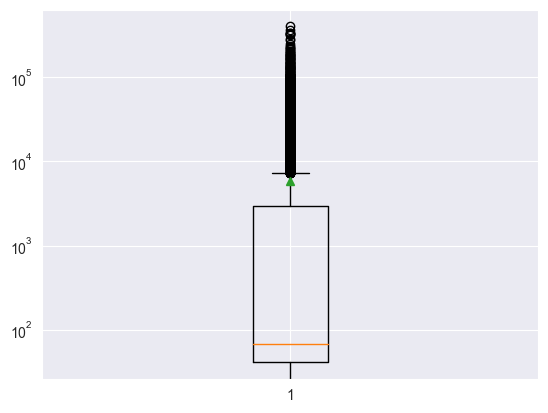

In [6]:
plt.boxplot(nonnull_users.statuses_count,showmeans=True)
plt.yscale('log')
plt.show()

The boxplot shows that the mean is near the 90th percentile, so we find more reasonable to use the median to replace the missing values for the `statuses_count` attribute.

Replace null `statuses_count` values with median of `statuses_count` of the other users

In [7]:
df_users.statuses_count.fillna(median_statuses_count, inplace=True)

Evaluating outliers of `statuses_count`

In [8]:
idx = df_users.statuses_count.idxmax()
df_users.loc[idx]

id                         1038481676
name                 News This Second
lang                               en
bot                                 0
created_at        2017-12-29 01:09:46
statuses_count               399555.0
Name: 1391, dtype: object

The max value over `statuses_count` column has a reasonable value so we will not perform any outlier detection for this attribute

In [9]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11508 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


# Created_at

In [10]:
df_users['created_at_conv'] = pd.to_datetime(df_users['created_at']).astype(np.int64)
df_users

,id,name,lang,bot,created_at,statuses_count,created_at_conv
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0,1550858442000000000
1,2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0,1551150152000000000
2,137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0,1430377796000000000
3,466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0,1484707758000000000
4,2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0,1560886221000000000
...,...,...,...,...,...,...,...
11503,2911861962,Madrid Lae Maika .,en,0,2019-11-29 13:16:02,1126.0,1575033362000000000
11504,1378532629,Clau Sato,en,0,2018-04-27 03:01:58,3024.0,1524798118000000000
11505,126984069,ALMA LETICIA NUÑO,es,0,2015-03-29 17:01:24,6.0,1427648484000000000
11506,2383025796,Minnie Guadagno,en,1,2019-03-13 02:44:13,42.0,1552445053000000000


<AxesSubplot: >

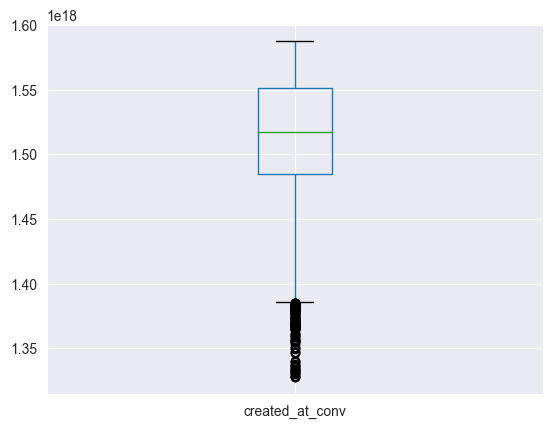

In [11]:
df_users.boxplot(['created_at_conv'])

In [12]:
df_users[np.logical_and(df_users['created_at_conv'] > 1.50e18, df_users['created_at_conv'] < 1.56e18)] # Min: 2017-07-14 05:34:46 Max: 2019-06-08 10:26:46

,id,name,lang,bot,created_at,statuses_count,created_at_conv
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0,1550858442000000000
1,2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0,1551150152000000000
5,2199062688,Qq,en,0,2018-11-19 06:58:18,7406.0,1542610698000000000
6,1174869769,Tania Wren,en,1,2018-02-15 10:51:28,21.0,1518691888000000000
9,2357425536,Meda Tatlock,en,1,2019-02-25 04:30:56,69.0,1551069056000000000
...,...,...,...,...,...,...,...
11501,2364683192,Larhonda Antu,en,1,2019-03-01 21:47:03,63.0,1551476823000000000
11502,1901595415,Prity Baleja,en,0,2018-09-26 19:48:46,359.0,1537991326000000000
11504,1378532629,Clau Sato,en,0,2018-04-27 03:01:58,3024.0,1524798118000000000
11506,2383025796,Minnie Guadagno,en,1,2019-03-13 02:44:13,42.0,1552445053000000000


Users outliers still have possible `created_at` values (2012 is plausible, unlike 1960).
If any analyses should be performed on the `created_at` column we must take into account that there are many outliers.

In [13]:
df_users.loc[df_users.created_at_conv.idxmin()]

id                              678033
name                      Heather Gold
lang                                en
bot                                  0
created_at         2012-01-24 01:57:38
statuses_count                 45825.0
created_at_conv    1327370258000000000
Name: 3878, dtype: object

# Language field

To understand the impact of the possible changes the number of tweets contained in the tweets file have been taken in account. The accounts seem to be active and have a lot of related tweets. The attribute is categorical so this value could be replaced by the mode which is the 'en' language.
Since there are only three users, to double-check the validity of our choice the relative tweets have been analyzed. The check confirmed that 'en' is the right choice.

In [14]:
df_users['lang'].value_counts()

en                    9970
it                     906
es                     319
pt                      65
en-gb                   50
ru                      42
fr                      36
ja                      33
zh-tw                   17
tr                      14
id                      12
ko                       9
de                       8
nl                       6
en-GB                    4
ar                       3
zh-TW                    3
da                       2
Select Language...       2
en-AU                    1
zh-cn                    1
pl                       1
el                       1
fil                      1
sv                       1
xx-lc                    1
Name: lang, dtype: int64

In [15]:
df_users['lang'].replace({'en-gb':'en-GB','zh-tw':'zh-TW'}, inplace=True)

In [16]:
df_users['lang'].value_counts()

en                    9970
it                     906
es                     319
pt                      65
en-GB                   54
ru                      42
fr                      36
ja                      33
zh-TW                   20
tr                      14
id                      12
ko                       9
de                       8
nl                       6
ar                       3
da                       2
Select Language...       2
en-AU                    1
zh-cn                    1
pl                       1
el                       1
fil                      1
sv                       1
xx-lc                    1
Name: lang, dtype: int64

In [17]:
df_users[np.logical_or(df_users['lang'] == 'Select Language...', df_users['lang'] == 'xx-lc')]

,id,name,lang,bot,created_at,statuses_count,created_at_conv
4166,2956613720,Leanne Arker,Select Language...,0,2020-01-05 00:09:59,57.0,1578182999000000000
8666,2904858613,Brooke,Select Language...,0,2019-11-22 05:44:46,85.0,1574401486000000000
10065,29552151,Chloe,xx-lc,0,2014-04-09 21:36:02,15398.0,1397079362000000000


Select all tweets that have the user_ids of people who have "Select Language..." and "xx-lc" as language

In [18]:
ids = df_users[np.logical_or(df_users['lang'] == 'Select Language...', df_users['lang'] == 'xx-lc')].id.values.astype(str)
pd.set_option('display.max_rows',200)
df_tweets[df_tweets['user_id'].isin(ids[2:])]

,level_0,id,user_id,created_at,text,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,user_id_conv,created_at_conv
6047,6047,491274532679081984,29552151,2019-07-23 17:32:30,"Spent the majority of my day drawing around, c...",0.0,0.0,0.0,0.0,0.0,0.0,29552151.0,1563903150000000000
12075,12075,488693001456463872,29552151,2019-07-16 14:34:25,We all love dem cuddles. http://t.co/fPrcnUfacS,0.0,0.0,0.0,0.0,0.0,0.0,29552151.0,1563287665000000000
15750,15750,485410906692919297,29552151,2019-07-07 13:12:33,Dog sitting until 8 tonight. Again..,0.0,0.0,0.0,0.0,0.0,0.0,29552151.0,1562505153000000000
16738,16738,1683542282301364,29552151,2019-07-16 20:58:50,"@Cock_Penis Yes, of course. A not so very good...",0.0,0.0,0.0,0.0,0.0,0.0,29552151.0,1563310730000000000
17242,17242,7055458923,29552151,2020-02-27 20:17:18,The chocolate is soooooooooooo amazing.,0.0,0.0,0.0,0.0,0.0,0.0,29552151.0,1582834638000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10164051,10164051,489336686300889088,29552151,2019-07-18 09:12:12,RT @CNET: Marvel announces a new comic book se...,74.0,0.0,0.0,0.0,1.0,1.0,29552151.0,1563441132000000000
10171614,10171614,492646759857152000,29552151,2019-07-27 12:25:15,@Cock_Penis Around 4 hopefully...Got to go to ...,0.0,0.0,0.0,0.0,0.0,0.0,29552151.0,1564230315000000000
10172230,10172230,479715963076874241,29552151,2019-06-21 20:02:52,I'd love to have white hair for real though.,0.0,0.0,0.0,0.0,0.0,0.0,29552151.0,1561147372000000000
10173707,10173707,562936922881159168,29552151,2020-02-06 11:33:15,Is there a way to wake up without feeling like...,0.0,0.0,0.0,0.0,0.0,0.0,29552151.0,1580988795000000000


In [19]:
df_users['lang'].replace({'Select Language...':'en','xx-lc':'en'}, inplace=True)

In [20]:
df_users['lang'].value_counts()

en       9973
it        906
es        319
pt         65
en-GB      54
ru         42
fr         36
ja         33
zh-TW      20
tr         14
id         12
ko          9
de          8
nl          6
ar          3
da          2
en-AU       1
zh-cn       1
pl          1
el          1
fil         1
sv          1
Name: lang, dtype: int64

In [21]:
df_users.to_csv(path_or_buf=DATA_PATH+'users_clean.csv', sep='#', index=False)